In [1]:
#importing the necessary libraries
library(reshape2)
library(ggplot2)
library(corrplot)
library(datasets)
library(dplyr)

Warning message:
"package 'reshape2' was built under R version 3.6.3"corrplot 0.92 loaded

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
## Question 2 I.


#Defining the KNN function from Question 1
knn <- function(train.data, train.label, test.data, K=3){

    #initialising the vector to store mean
    mean.value <-vector()
    
    #calculating the lengths of training and testing data
    train.len <- length(train.data)
    test.len <- length(test.data)
  

    # calculate distances between samples
    dist <- as.matrix(dist(append(test.data,train.data)),method = 'euclidean')[1:test.len,((test.len+1):(test.len+train.len))]
    
    #reformatting the train.label 
    train.label <- matrix(train.label)
    # For each test sample do:
    for (i in 1:test.len){
        
        # ...find its K nearest neighbours from training samples...
        
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        #Calculating the mean value of the K nearest neighbors
         
        mean.value[i] <- sum(train.label[nn,])/K
    }
    
    # Return the mean value as output
    return (mean.value)
}


In [3]:
#defining the rmse function
rmse <- function(initial, predicted) {
  #calculating the rmse value  
  RMSE <- (sum((predicted - initial)**2) /length(initial))**0.5 
  return (RMSE)
}

In [4]:
#Defining a function validation that calculates the validation index and returns the corresponding data
validation <- function(train_len,train_subset,numFold,i){
    
    #calculating the validation data set size
    Validation_dataset_size = floor(train_len/ numFold)
    
    #calculating the validation index
    validation_index = train_subset[(Validation_dataset_size + i):(i*Validation_dataset_size)]
    
    return(validation_index)
}

In [5]:
cv <- function (train.data, train.label, numFold=10, K=4){
    cv_rmse <- data.frame('L'=rep(0,numFold),'K'=rep(0,K), 'RMSE'=rep(0, numFold * K))
    #Calculating the length of the training set
    train_len = dim(train.data)[1]
    
    train_subset = sample(1:train_len,train_len,replace = FALSE)
    k = 1
    while (k!=K+1) {
    
        for (i in 1:numFold) {  
             validation_index = validation(train_len,train_subset,numFold,i)
             train_index = train_subset[-validation_index]
             
             index = (k-1)*numFold + i
             cv_rmse[index,1] = i
             cv_rmse[index,2] = k
             cv_rmse[index,3] = rmse(knn(train.data[train_index,],train.label[train_index,],train.data[validation_index,],K=k), train.label[validation_index,])
        }
     k =k+1
    }
   return(cv_rmse)
}

In [7]:
#calling the cv function 
cv(train.data,train.label,numFold = 10,K = 4)

L,K,RMSE
1,1,0.00000000
2,1,0.00000000
3,1,0.03743670
4,1,0.03056693
5,1,0.02516073
6,1,0.03597394
7,1,0.06322658
8,1,0.09118406
9,1,0.10212808
10,1,0.21180662


In [25]:
## Question2 II

#Reading the required data
train.data = read.csv("assignment1_datasets/Task1A_train.csv")
test.data=read.csv("assignment1_datasets/Task1A_test.csv")

#assigning train label values to a seperate variable 
train.label <- train.data[2]

#assigning train data to a seperate variable 
train.data <- train.data[1]

#assigning test label values to a seperate variable 
test.label <- test.data[2]

#assigning test data to a seperate variable 
test.data <- test.data[1]



In [26]:
#initialising the vector to store error values
error_avg <-c()

#initialising a vector to store the correspoding k value for each error
K_num <-c()

#looping through 15 values of k ro calculate the corresponding error
for(k in 1:15){
    input <- cv(train.data,train.label,numFold = 10,K = k)
    
    #error is calculated by taking the average over all values returned
    error_avg[k] <-mean(input[,3])
    
    #storing the corresponding k
    K_num[k] <- k
    }


In [27]:
#Displaying the error values 
error_avg

[1] 0.3217066 0.8085518 0.7067406 0.4193299 0.6399010 0.6843911 0.7761746
 [8] 0.7709830 0.5712889 0.6626750 1.3830604 0.9909790 1.0962943 1.5300789
[15] 1.3359767

In [28]:
#defining a data frame for the sake of plotting
cv_error <- data.frame(K = K_num,error = error_avg )

#melting for passing to ggplot
melt_cv_error <- melt(cv_error, id='K')

In [29]:
#melted data frame
melt_cv_error

K,variable,value
1,error,0.3217066
2,error,0.8085518
3,error,0.7067406
4,error,0.4193299
5,error,0.6399010
6,error,0.6843911
7,error,0.7761746
8,error,0.7709830
9,error,0.5712889
10,error,0.6626750


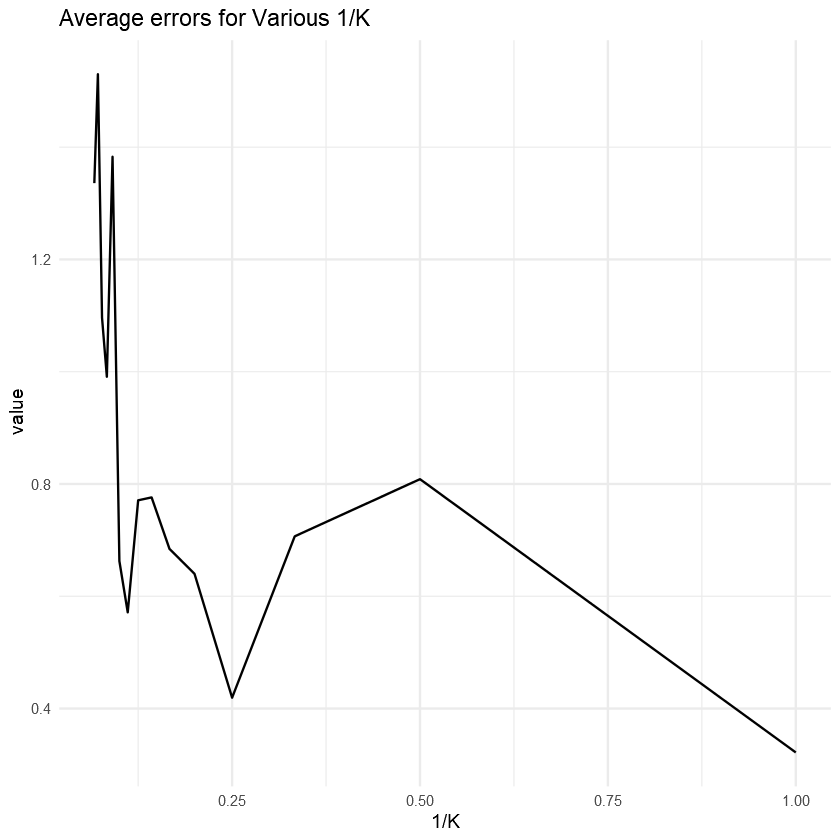

In [30]:
#plotting the RMSE for various 1/K
ggplot(data=melt_cv_error, aes(x=1/K, y=value)) + geom_line()  +
       ggtitle("Average errors for Various 1/K") + theme_minimal()